## Stain Augmentation 

## 1. Take the Stain Normalisation 
## 2. Stain Augementation 
## Add this two by Dirichlet and reduce the Staining from pathces 


In [35]:
import numpy as np
import cv2
import os

input_dir = "data/GBM/"
input_image_list = os.listdir(input_dir)

output_dir = "data/stain_normalization/"



In [36]:
def get_mean_and_std(x):
	x_mean, x_std = cv2.meanStdDev(x)
	x_mean = np.hstack(np.around(x_mean,2))
	x_std = np.hstack(np.around(x_std,2))
	return x_mean, x_std



In [39]:
template_img = cv2.imread('data\GBM\GBM-Grade IV-G4.jpg')
template_img = cv2.cvtColor(template_img,cv2.COLOR_BGR2LAB)
template_mean, template_std = get_mean_and_std(template_img)
if not os.path.exists(output_dir):
    os.mkdir(output_dir)



In [40]:
for img in (input_image_list):
    print(img)
    input_img = cv2.imread(input_dir+img)
    input_img = cv2.cvtColor(input_img,cv2.COLOR_BGR2LAB)
    
    
    img_mean, img_std = get_mean_and_std(input_img)
    
    
    height, width, channel = input_img.shape
    for i in range(0,height):
        for j in range(0,width):
            for k in range(0,channel):
            	x = input_img[i,j,k]
            	x = ((x-img_mean[k])*(template_std[k]/img_std[k]))+template_mean[k]
            	x = round(x)
            	# boundary check
            	x = 0 if x<0 else x
            	x = 255 if x>255 else x
            	input_img[i,j,k] = x
            
    input_img= cv2.cvtColor(input_img,cv2.COLOR_LAB2BGR)
    cv2.imwrite(output_dir+"modified_"+img, input_img)

GBM-Grade IV Age-47.jpg
GBM-Grade IV-1.jpg
GBM-Grade IV-10.jpg
GBM-Grade IV-11.jpg
GBM-Grade IV-12.jpg
GBM-Grade IV-2.jpg
GBM-Grade IV-3.jpg
GBM-Grade IV-4.jpg
GBM-Grade IV-5.jpg
GBM-Grade IV-9.jpg
GBM-Grade IV-C10.jpg
GBM-Grade IV-C3.jpg
GBM-Grade IV-C4.jpg
GBM-Grade IV-C5.jpg
GBM-Grade IV-C6.jpg
GBM-Grade IV-C7.jpg
GBM-Grade IV-C8.jpg
GBM-Grade IV-C9.jpg
GBM-Grade IV-D1.jpg
GBM-Grade IV-D10.jpg
GBM-Grade IV-D2.jpg
GBM-Grade IV-D3.jpg
GBM-Grade IV-D4.jpg
GBM-Grade IV-D5.jpg
GBM-Grade IV-D6.jpg
GBM-Grade IV-D7.jpg
GBM-Grade IV-D8.jpg
GBM-Grade IV-D9.jpg
GBM-Grade IV-E1.jpg
GBM-Grade IV-E2.jpg
GBM-Grade IV-E3.jpg
GBM-Grade IV-E4.jpg
GBM-Grade IV-E7.jpg
GBM-Grade IV-E8.jpg
GBM-Grade IV-F1.jpg
GBM-Grade IV-F10.jpg
GBM-Grade IV-F2.jpg
GBM-Grade IV-F3.jpg
GBM-Grade IV-F4.jpg
GBM-Grade IV-F5.jpg
GBM-Grade IV-F6.jpg
GBM-Grade IV-F7.jpg
GBM-Grade IV-F8.jpg
GBM-Grade IV-F9.jpg
GBM-Grade IV-G1.jpg
GBM-Grade IV-G10.jpg
GBM-Grade IV-G2.jpg
GBM-Grade IV-G3.jpg
GBM-Grade IV-G4.jpg
GBM-Grade IV-G5.jp

In [43]:
# !pip install fitter

In [54]:
os.chdir('../')

In [55]:
%pwd

'd:\\'

In [60]:
%pwd

'd:\\data'

In [69]:
# cd dataos.cw
os.chdir(r'D:\\VIVI_AI\\data')


In [70]:
%pwd

'D:\\VIVI_AI\\data'

cd D:\VIVI_AI\data

In [71]:
import os
import cv2
import numpy as np
import time
import yaml
import random
from skimage import color
from fitter import Fitter

### Inputs ###
path_dataset = "train/"
save_dir ="output"
dataset_name = "random_images"
methods = 'Reinhard' 
color_space = 'LAB' #LAB, HED or HSV
randomize = True #Randomize the image style class 
n = 0

### Get average and standard deviation from an image, for each channel (L, A, B)
def getavgstd(image):
    avg = []
    std = []
    image_avg_l = np.mean(image[:, :, 0])
    image_std_l = np.std(image[:, :, 0])
    image_avg_a = np.mean(image[:, :, 1])
    image_std_a = np.std(image[:, :, 1])
    image_avg_b = np.mean(image[:, :, 2])
    image_std_b = np.std(image[:, :, 2])
    avg.append(image_avg_l)
    avg.append(image_avg_a)
    avg.append(image_avg_b)
    std.append(image_std_l)
    std.append(image_std_a)
    std.append(image_std_b)
    return (avg, std)
   

labL_avg_List = []
labA_avg_List = []
labB_avg_List = []
labL_std_List = []
labA_std_List = []
labB_std_List = []

t1 = time.time()
i = 0

for class_dir in os.listdir(path_dataset):
    path_class = os.path.join(path_dataset, class_dir)
    print(path_class)

    path_class_list = os.listdir(path_class)
    if randomize == True:
        random.shuffle(path_class_list)

    for image in path_class_list:
        if n == 0:  # n=0: all images each class
            pass
        elif i < n:
            i += 1
        else:
            i = 0
            break
        path_img = os.path.join(path_class, image)
        img = cv2.imread(path_img)
        try:  # debug
            if color_space == "LAB":
                img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
            elif color_space == "HED":
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = color.rgb2hed(img)
            elif color_space == "HSV":
                img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            else:
                print("wrong color space: {}!!".format(color_space))
            img_avg, img_std = getavgstd(img)
        except:
            continue
            print(path_img)
        labL_avg_List.append(img_avg[0])
        labA_avg_List.append(img_avg[1])
        labB_avg_List.append(img_avg[2])
        labL_std_List.append(img_std[0])
        labA_std_List.append(img_std[1])
        labB_std_List.append(img_std[2])
t2 = time.time()
print(t2 - t1)
l_avg_mean = np.mean(labL_avg_List).item()
l_avg_std = np.std(labL_avg_List).item()
l_std_mean = np.mean(labL_std_List).item()
l_std_std = np.std(labL_std_List).item()
a_avg_mean = np.mean(labA_avg_List).item()
a_avg_std = np.std(labA_avg_List).item()
a_std_mean = np.mean(labA_std_List).item()
a_std_std = np.std(labA_std_List).item()
b_avg_mean = np.mean(labB_avg_List).item()
b_avg_std = np.std(labB_avg_List).item()
b_std_mean = np.mean(labB_std_List).item()
b_std_std = np.std(labB_std_List).item()

std_avg_list = [
    labL_avg_List,
    labL_std_List,
    labA_avg_List,
    labA_std_List,
    labB_avg_List,
    labB_std_List,
]
distribution = []
for std_avg in std_avg_list:
    f = Fitter(std_avg, distributions=["norm", "laplace"])
    f.fit()
    distribution.append(list(f.get_best(method="sumsquare_error").keys())[0])

yaml_dict_lab = {
    "random": randomize,
    "n_each_class": n,
    "color_space": color_space,
    "methods": methods,
    "{}".format(color_space[0]): {  # lab-L/hed-H
        "avg": {
            "mean": round(l_avg_mean, 3),
            "std": round(l_avg_std, 3),
            "distribution": distribution[0],
        },
        "std": {
            "mean": round(l_std_mean, 3),
            "std": round(l_std_std, 3),
            "distribution": distribution[1],
        },
    },
    "{}".format(color_space[1]): {  # lab-A/hed-E
        "avg": {
            "mean": round(a_avg_mean, 3),
            "std": round(a_avg_std, 3),
            "distribution": distribution[2],
        },
        "std": {
            "mean": round(a_std_mean, 3),
            "std": round(a_std_std, 3),
            "distribution": distribution[3],
        },
    },
    "{}".format(color_space[2]): {  # lab-B/hed-D
        "avg": {
            "mean": round(b_avg_mean, 3),
            "std": round(b_avg_std, 3),
            "distribution": distribution[4],
        },
        "std": {
            "mean": round(b_std_mean, 3),
            "std": round(b_std_std, 3),
            "distribution": distribution[5],
        },
    },
}
yaml_save_path = "{}/{}.yaml".format(
    save_dir,
    dataset_name
    if dataset_name != ""
    else "dataset_{}_random{}_n{}".format(color_space, randomize, n),
)
with open(yaml_save_path, "w") as f:
    yaml.dump(yaml_dict_lab, f)
    print("The dataset lab statistics has been saved in {}".format(yaml_save_path))

train/style1
train/style2
0.20146536827087402
The dataset lab statistics has been saved in output/random_images.yaml


In [5]:
import os 

In [6]:
%pwd

'd:\\VIVI_AI\\experiment'

In [7]:
os.chdir('../')

In [12]:
import tensorflow as tf
import os

dir_path = r'data/GBM/'
img_list = os.listdir(dir_path)

save_dir_path = "data/stain_augmentation"
if not os.path.exists(save_dir_path):
    os.mkdir(save_dir_path)



In [13]:
# Function for applying random color jitter effects
def apply_color_jitter(image):
    image = tf.image.random_brightness(image, max_delta=0.35)
    image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
    image = tf.image.random_hue(image, max_delta=0.5)
    return image


In [14]:
# Loop through the images and apply color jitter
for img_path in img_list:
    full_img_path = dir_path + img_path
    print(full_img_path)
    # Load image as a tensor and normalize to [0, 1] range
    image = tf.io.read_file(full_img_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Apply color jitter augmentation
    augmented_image = apply_color_jitter(image)

    # Save the augmented image
    save_img_path = save_dir_path + "/{}".format(img_path.split("/")[-1])
    augmented_image = tf.image.convert_image_dtype(augmented_image, tf.uint8)
    encoded_image = tf.io.encode_jpeg(augmented_image)
    tf.io.write_file(save_img_path, encoded_image)

data/GBM/GBM-Grade IV Age-47.jpg
data/GBM/GBM-Grade IV-1.jpg
data/GBM/GBM-Grade IV-10.jpg
data/GBM/GBM-Grade IV-11.jpg
data/GBM/GBM-Grade IV-12.jpg
data/GBM/GBM-Grade IV-2.jpg
data/GBM/GBM-Grade IV-3.jpg
data/GBM/GBM-Grade IV-4.jpg
data/GBM/GBM-Grade IV-5.jpg
data/GBM/GBM-Grade IV-9.jpg
data/GBM/GBM-Grade IV-C10.jpg
data/GBM/GBM-Grade IV-C3.jpg
data/GBM/GBM-Grade IV-C4.jpg
data/GBM/GBM-Grade IV-C5.jpg
data/GBM/GBM-Grade IV-C6.jpg
data/GBM/GBM-Grade IV-C7.jpg
data/GBM/GBM-Grade IV-C8.jpg
data/GBM/GBM-Grade IV-C9.jpg
data/GBM/GBM-Grade IV-D1.jpg
data/GBM/GBM-Grade IV-D10.jpg
data/GBM/GBM-Grade IV-D2.jpg
data/GBM/GBM-Grade IV-D3.jpg
data/GBM/GBM-Grade IV-D4.jpg
data/GBM/GBM-Grade IV-D5.jpg
data/GBM/GBM-Grade IV-D6.jpg
data/GBM/GBM-Grade IV-D7.jpg
data/GBM/GBM-Grade IV-D8.jpg
data/GBM/GBM-Grade IV-D9.jpg
data/GBM/GBM-Grade IV-E1.jpg
data/GBM/GBM-Grade IV-E2.jpg
data/GBM/GBM-Grade IV-E3.jpg
data/GBM/GBM-Grade IV-E4.jpg
data/GBM/GBM-Grade IV-E7.jpg
data/GBM/GBM-Grade IV-E8.jpg
data/GBM/GBM-G

In [32]:
stain_path=r"data/stain_augmentation/"

In [33]:
import matplotlib.pyplot as plt 

data/stain_augmentation/GBM-Grade IV-1.jpg


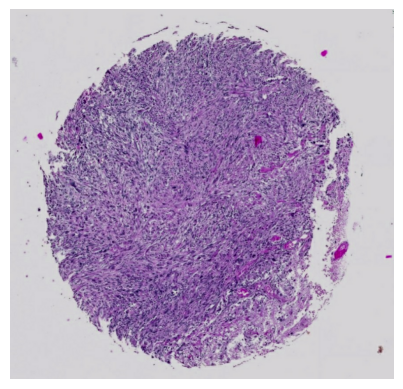

In [34]:
# Loop through the images and apply color jitter

full_img_path = stain_path + "GBM-Grade IV-1.jpg"
print(full_img_path)
# Load image as a tensor and normalize to [0, 1] range
image = tf.io.read_file(full_img_path)
image = tf.image.decode_image(image, channels=3)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # To hide axis if needed
plt.show()

In [77]:
import cv2
import numpy as np
from skimage import color
from typing import Optional, Dict
import yaml

# ToDo: add documents


class Dict2Class(object):
    # ToDo: Wrap into RandStainNA
    def __init__(self, my_dict: Dict):
        self.my_dict = my_dict
        for key in my_dict:
            setattr(self, key, my_dict[key])


def get_yaml_data(yaml_file):
    # ToDo: Wrap into RandStainNA
    file = open(yaml_file, "r", encoding="utf-8")
    file_data = file.read()
    file.close()
    # str->dict
    data = yaml.load(file_data, Loader=yaml.FullLoader)

    return data


class RandStainNA(object):
    # ToDo: support downloading yaml file from online if the path is not provided.
    def __init__(
        self,
        yaml_file: str,
        std_hyper: Optional[float] = 0,
        distribution: Optional[str] = "normal",
        probability: Optional[float] = 1.0,
        is_train: Optional[bool] = True,
    ):

        # true:training setting/false: demo setting

        assert distribution in [
            "normal",
            "laplace",
            "uniform",
        ], "Unsupported distribution style {}.".format(distribution)

        self.yaml_file = yaml_file
        cfg = get_yaml_data(self.yaml_file)
        c_s = cfg["color_space"]

        self._channel_avgs = {
            "avg": [
                cfg[c_s[0]]["avg"]["mean"],
                cfg[c_s[1]]["avg"]["mean"],
                cfg[c_s[2]]["avg"]["mean"],
            ],
            "std": [
                cfg[c_s[0]]["avg"]["std"],
                cfg[c_s[1]]["avg"]["std"],
                cfg[c_s[2]]["avg"]["std"],
            ],
        }
        self._channel_stds = {
            "avg": [
                cfg[c_s[0]]["std"]["mean"],
                cfg[c_s[1]]["std"]["mean"],
                cfg[c_s[2]]["std"]["mean"],
            ],
            "std": [
                cfg[c_s[0]]["std"]["std"],
                cfg[c_s[1]]["std"]["std"],
                cfg[c_s[2]]["std"]["std"],
            ],
        }

        self.channel_avgs = Dict2Class(self._channel_avgs)
        self.channel_stds = Dict2Class(self._channel_stds)

        self.color_space = cfg["color_space"]
        self.p = probability
        self.std_adjust = std_hyper
        self.color_space = c_s
        self.distribution = distribution
        self.is_train = is_train

    def _getavgstd(self, image: np.ndarray, isReturnNumpy: Optional[bool] = True):

        avgs = []
        stds = []

        num_of_channel = image.shape[2]
        for idx in range(num_of_channel):
            avgs.append(np.mean(image[:, :, idx]))
            stds.append(np.std(image[:, :, idx]))

        if isReturnNumpy:
            return (np.array(avgs), np.array(stds))
        else:
            return (avgs, stds)

    def _normalize(
        self,
        img: np.ndarray,
        img_avgs: np.ndarray,
        img_stds: np.ndarray,
        tar_avgs: np.ndarray,
        tar_stds: np.ndarray,
    ) -> np.ndarray:

        img_stds = np.clip(img_stds, 0.0001, 255)
        img = (img - img_avgs) * (tar_stds / img_stds) + tar_avgs

        if self.color_space in ["LAB", "HSV"]:
            img = np.clip(img, 0, 255).astype(np.uint8)

        return img

    def augment(self, img):
        # img:is_train:false——>np.array()(cv2.imread()) #BGR
        # img:is_train:True——>PIL.Image #RGB

        if self.is_train == False:
            image = img
        else:
            image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

        num_of_channel = image.shape[2]

        # color space transfer
        if self.color_space == "LAB":
            image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        elif self.color_space == "HSV":
            image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        elif self.color_space == "HED":
            image = color.rgb2hed(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        std_adjust = self.std_adjust

        # virtual template generation
        tar_avgs = []
        tar_stds = []
        if self.distribution == "uniform":

            # three-sigma rule for uniform distribution
            for idx in range(num_of_channel):

                tar_avg = np.random.uniform(
                    low=self.channel_avgs.avg[idx] - 3 * self.channel_avgs.std[idx],
                    high=self.channel_avgs.avg[idx] + 3 * self.channel_avgs.std[idx],
                )
                tar_std = np.random.uniform(
                    low=self.channel_avgs.avg[idx] - 3 * self.channel_avgs.std[idx],
                    high=self.channel_avgs.avg[idx] + 3 * self.channel_avgs.std[idx],
                )

                tar_avgs.append(tar_avg)
                tar_stds.append(tar_std)
        else:
            if self.distribution == "normal":
                np_distribution = np.random.normal
            elif self.distribution == "laplace":
                np_distribution = np.random.laplace

            for idx in range(num_of_channel):
                tar_avg = np_distribution(
                    loc=self.channel_avgs.avg[idx],
                    scale=self.channel_avgs.std[idx] * (1 + std_adjust),
                )

                tar_std = np_distribution(
                    loc=self.channel_stds.avg[idx],
                    scale=self.channel_stds.std[idx] * (1 + std_adjust),
                )
                tar_avgs.append(tar_avg)
                tar_stds.append(tar_std)

        tar_avgs = np.array(tar_avgs)
        tar_stds = np.array(tar_stds)

        img_avgs, img_stds = self._getavgstd(image)

        image = self._normalize(
            img=image,
            img_avgs=img_avgs,
            img_stds=img_stds,
            tar_avgs=tar_avgs,
            tar_stds=tar_stds,
        )

        if self.color_space == "LAB":
            image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
        elif self.color_space == "HSV":
            image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
        elif self.color_space == "HED":
            nimg = color.hed2rgb(image)
            imin = nimg.min()
            imax = nimg.max()
            rsimg = (255 * (nimg - imin) / (imax - imin)).astype(
                "uint8"
            )  # rescale to [0,255]

            image = cv2.cvtColor(rsimg, cv2.COLOR_RGB2BGR)

        return image

    def __call__(self, img):
        if np.random.rand(1) < self.p:
            return self.augment(img)
        else:
            return img

    def __repr__(self):
        format_string = self.__class__.__name__ + "("
        format_string += f"methods=Reinhard"
        format_string += f", colorspace={self.color_space}"
        format_string += f", mean={self._channel_avgs}"
        format_string += f", std={self._channel_stds}"
        format_string += f", std_adjust={self.std_adjust}"
        format_string += f", distribution={self.distribution}"
        format_string += f", p={self.p})"
        return format_string

In [82]:
os.chdir('../')

In [87]:
import os
import cv2
# from randstainna import RandStainNA  # Uncomment this line to import your class

# Initialize RandStainNA
randstainna = RandStainNA(
    yaml_file=r'data/output/random_images.yaml',
    std_hyper=0.0,
    distribution='normal',
    probability=1.0,
    is_train=False
)

# Define the directory containing original images and output directory for augmented images
dir_path = r'data/stain_augmentation/'
img_list = os.listdir(dir_path)

save_dir_path = r'data/augmented/'
if not os.path.exists(save_dir_path):
    os.mkdir(save_dir_path)

# Process each image in the directory
for img_name in img_list:
    full_img_path = os.path.join(dir_path, img_name)  # Create the full path for the image

    # Load the image
    img = cv2.imread(full_img_path)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Warning: Unable to read image at {full_img_path}. Skipping...")
        continue  # Skip to the next image if loading failed

    # Apply the RandStainNA augmentation
    augmented_img = randstainna(img)

    # Save the augmented image
    save_img_path = os.path.join(save_dir_path, img_name)  # Create the full save path
    cv2.imwrite(save_img_path, augmented_img)  # Write the augmented image to disk

print("Image augmentation completed.")


Image augmentation completed.
